In [30]:
from pycaret.regression import *
from pycaret.datasets import get_data
import pandas as pd
df0 = pd.read_csv('C:/Users/Rui/OneDrive/桌面/data_xn/AUDCHF_six_hourly_data.csv')
print(df0.shape)
df0.head()

(1459, 12)


,datetime,v,vw,o,c,h,l,t,n,hourly_vwap,hourly_liquidity,fd
0,2011-01-02 12:00:00,247.000000,0.953708,0.953490,0.953950,0.95469,0.95269,1.552788e+13,247.000000,235.565958,247.000000,123500.000000
1,2011-01-02 18:00:00,490.000000,0.953492,0.953478,0.953563,0.95499,0.95184,2.048836e+13,490.000000,467.241197,490.000000,155555.555556
2,2011-01-03 00:00:00,688.833333,0.954715,0.954877,0.954917,0.95611,0.95319,2.005736e+13,688.833333,657.713881,688.833333,235901.826484
3,2011-01-03 06:00:00,1318.000000,0.953082,0.953348,0.952788,0.95579,0.95113,1.725394e+13,1318.000000,1255.780841,1318.000000,282832.618026
4,2011-01-03 12:00:00,947.666667,0.950336,0.950662,0.950148,0.95242,0.94829,1.941100e+13,947.666667,901.134763,947.666667,229459.241324


In [17]:
(df0.isnull().sum() / len(df0)).sort_values(ascending=False)[:20]

vw                  0.253598
o                   0.253598
c                   0.253598
h                   0.253598
l                   0.253598
hourly_vwap         0.253598
fd                  0.253598
datetime            0.000000
v                   0.000000
t                   0.000000
n                   0.000000
hourly_liquidity    0.000000
dtype: float64

In [18]:
df = df0.dropna(subset=['hourly_vwap'])  # Replace 'column_name' with the name of the column

In [19]:
data = df.sample(frac=0.7, random_state=786)
data_unseen = df.drop(data.index)
 
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
 
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (762, 12)
Unseen Data For Predictions: (327, 12)


In [20]:
from pycaret.regression import *
setup(data = data, target = 'hourly_vwap', session_id=123) 

,Description,Value
0,Session id,123
1,Target,hourly_vwap
2,Target type,Regression
3,Original data shape,"(762, 12)"
4,Transformed data shape,"(762, 12)"
5,Transformed train set shape,"(533, 12)"
6,Transformed test set shape,"(229, 12)"
7,Numeric features,10
8,Categorical features,1
9,Preprocess,True


In [21]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,107.2524,79973.7502,259.5422,0.9947,0.1253,0.0483,0.0760
gbr,Gradient Boosting Regressor,160.4648,85470.8610,266.4662,0.9945,0.1361,0.0630,0.0730
lr,Linear Regression,190.8397,110089.6195,323.1440,0.9928,0.2515,0.1510,0.3020
lasso,Lasso Regression,191.7777,110761.2618,324.1827,0.9928,0.2370,0.1468,0.1890
ridge,Ridge Regression,196.9504,113463.6142,328.8768,0.9926,0.2229,0.1411,0.1360
rf,Random Forest Regressor,184.4675,138605.6439,352.8593,0.9909,0.1439,0.0649,0.1090
en,Elastic Net,290.5858,196046.5267,437.0869,0.9868,0.1936,0.1275,0.0170
br,Bayesian Ridge,293.1412,198578.5656,439.9567,0.9867,0.1935,0.1275,0.0250
lightgbm,Light Gradient Boosting Machine,214.6162,236662.4237,435.6286,0.9849,0.1709,0.0828,0.1170
dt,Decision Tree Regressor,257.0440,239902.0348,467.8664,0.9846,0.1582,0.0673,0.0240


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [23]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,133.3927,122048.5935,349.3545,0.9939,0.1506,0.0422
1,111.1955,55323.3596,235.2092,0.9963,0.2720,0.1342
2,103.4205,64996.9236,254.9449,0.9956,0.0896,0.0297
3,86.8358,26430.8540,162.5757,0.9977,0.2502,0.1132
4,94.8251,36128.1172,190.0740,0.9978,0.1350,0.0434
5,76.7344,14850.7435,121.8636,0.9992,0.0340,0.0161
6,106.4267,67372.9939,259.5631,0.9934,0.0320,0.0177
7,95.2691,66810.7658,258.4778,0.9952,0.1650,0.0351
8,98.9696,46972.2479,216.7308,0.9967,0.0718,0.0292


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,205.6539,240023.0433,489.9215,0.9880,0.2136,0.0893
1,199.1876,121200.9989,348.1393,0.9920,0.3121,0.1802
2,199.4771,133727.6630,365.6879,0.9910,0.0656,0.0366
3,184.2093,86728.7767,294.4975,0.9926,0.3189,0.1997
4,273.8725,317180.6516,563.1879,0.9811,0.2415,0.1198
5,167.5413,73723.3077,271.5204,0.9959,0.0611,0.0317
6,190.0625,147634.9805,384.2330,0.9856,0.0483,0.0302
7,175.9056,121370.7885,348.3831,0.9912,0.1571,0.0554
8,218.8297,230698.2505,480.3106,0.9839,0.2272,0.1120


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


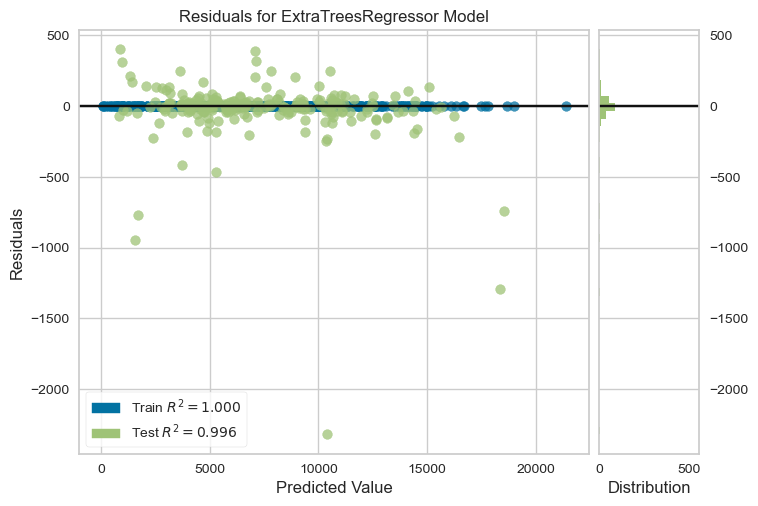

In [25]:
plot_model(et)

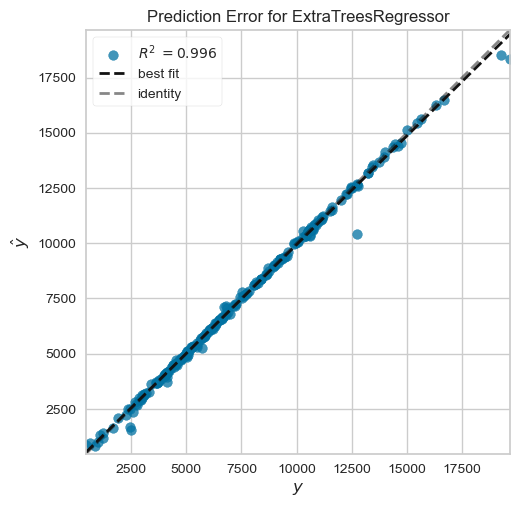

In [26]:
plot_model(et, plot = 'error')

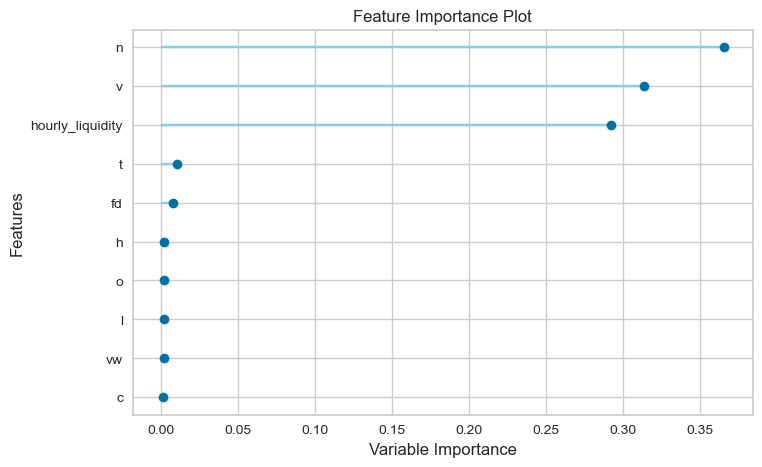

In [27]:
plot_model(tuned_et, plot='feature')

In [28]:
predict_model(et);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,88.6058,49733.8727,223.0109,0.9964,0.0687,0.0217


In [29]:
final_et = finalize_model(et)
print(final_et)

Pipeline(memory=FastMemory(location=C:\Users\Rui\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['v', 'vw', 'o', 'c', 'h', 'l', 't',
                                             'n', 'hourly_liquidity', 'fd'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['datetime'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['datetime'],
                                    transformer=LeaveOneOutEncoder(cols=['datetime'],
                                                                   handle_missing='return_nan',
                                                                   random_state=123))),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])
